In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d divg07/casia-20-image-tampering-detection-dataset

100% 2.55G/2.56G [00:25<00:00, 109MB/s] 
100% 2.56G/2.56G [00:25<00:00, 108MB/s]


In [ ]:
!ls

casia-20-image-tampering-detection-dataset.zip	kaggle.json  sample_data


In [ ]:
!unzip casia-20-image-tampering-detection-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00045_arc00046_10084.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00045_arc00071_10087.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00046_arc00045_10083.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00054_cha00085_11922.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00071_arc00045_10085.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00073_arc00072_10267.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_arc00088_arc00064_10394.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00012_art00013_11812.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00014_art00013_11836.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00058_art00049_10529.tif  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00067_ani00093_11801.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00067_ani00095_11803.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00067_ani00096_11802.jpg  
  inflating: CASIA2/Tp/Tp_D_CRN_M_N_art00067_nat00013_11804.jpg  
  inflating: CASIA2/Tp/Tp

In [ ]:
!ls

CASIA2						kaggle.json
casia-20-image-tampering-detection-dataset.zip	sample_data


In [ ]:
import keras
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import numpy as np

In [ ]:
im = Image.open(r"/content/CASIA2/CASIA 2 Groundtruth/Tp_D_CND_M_N_ani00018_sec00096_00138_gt.png")

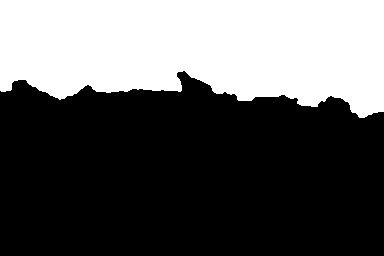

In [ ]:
im

In [ ]:
# im = Image.open(r"/content/CASIA2/Tp/Tp_D_CND_M_N_ani00018_sec00096_00138.tif")

In [ ]:
# im

In [ ]:
# im = Image.open(r"/content/CASIA2/Au/Au_ani_00001.jpg")

In [ ]:
# temp_filename='temp_file.jpg'
# im = Image.open(r"/content/CASIA2/Au/Au_ani_00001.jpg").convert('RGB')
# im.save(temp_filename, 'JPEG', quality = 18)
# temp_image = Image.open(temp_filename)

In [ ]:
# temp_image

In [ ]:
# im

In [ ]:
# from PIL import Image, ImageChops, ImageEnhance
# import os
# import itertools
# ela_image = ImageChops.darker(im, temp_image)

In [ ]:
import cv2
from PIL import Image, ImageChops, ImageEnhance
import os
import itertools

def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file.jpg'
    ela_filename = 'temp_ela_file.png'

    image = Image.open(path).convert('RGB')
    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    # print(extrema)
    max_diff = max([ex[1] for ex in extrema])
    # print(max_diff)
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff

    ela_image = ImageEnhance.Brightness(ela_image).enhance(10)

    return ela_image

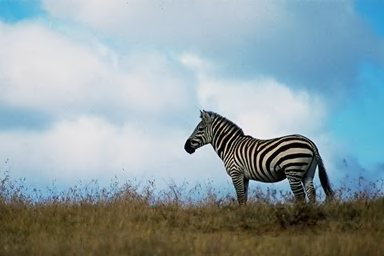

In [ ]:
real_image_path = '/content/CASIA2/Au/Au_ani_00001.jpg'
Image.open(real_image_path)

((0, 22), (0, 22), (0, 22))
22


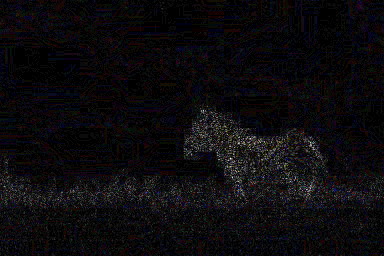

In [ ]:
convert_to_ela_image(real_image_path, 80)

In [ ]:
image_size = (128, 128)

def prepare_image(image_path):
    return np.array(convert_to_ela_image(image_path, 85).resize(image_size)).flatten() / 255.0

In [ ]:
X = [] # ELA converted images
Y = [] # 0 for fake, 1 for real

In [ ]:
import random
count = 0
path = '/content/CASIA2/Au'
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
#         count+=1
#         if count < 1000:
#             pass
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(1)
        if len(Y) % 1000 == 0:
            print(f'Processing {len(Y)} images')
            break
    if len(Y) % 1000 == 0:
        break

random.shuffle(X)
# X = X[:2100]
# Y = Y[:2100]
print(len(X), len(Y))

Processing 1000 images
1000 1000


In [ ]:
path = '/content/CASIA2/Tp'
count = 0
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
#         count += 1
#         if count < 1000:
#             pass
        if filename.endswith('jpg') or filename.endswith('png'):
            full_path = os.path.join(dirname, filename)
            X.append(prepare_image(full_path))
            Y.append(0)
        if len(Y) % 2000 == 0:
            print(f'Processing {len(Y)} images')
            break
    if len(Y) % 1700 == 0:
        break

print(len(X), len(Y))

Processing 2000 images
2000 2000


In [ ]:
from sklearn.utils import shuffle
for i in range(10):
    X, Y = shuffle(X, Y, random_state=i)

In [ ]:
from keras.utils.np_utils import to_categorical
X = np.array(X)
Y = to_categorical(Y, 2)
X = X.reshape(-1, 128, 128, 3)

In [ ]:
X.shape

(2000, 128, 128, 3)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2, random_state=42)
X = X.reshape(-1,1,1,1)
print(len(X_train), len(Y_train))
print(len(X_val), len(Y_val))

1600 1600
400 400


In [ ]:
X.shape

(98304000, 1, 1, 1)

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(Conv2D(filters = 32, kernel_size = (5, 5), padding = 'valid', activation = 'relu', input_shape = (128, 128, 3)))
    model.add(MaxPool2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))
    return model

model1 = build_model()
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 124, 124, 32)      2432      
                                                                 
 conv2d_19 (Conv2D)          (None, 120, 120, 32)      25632     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 60, 60, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 115200)            0         
                                                                 
 dense_10 (Dense)            (None, 256)               29491456  
                                                      

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv2D(input_shape=(128,128,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(units=512,activation="relu"))
    model.add(Dense(units=256,activation="relu"))
    model.add(Dense(units=2, activation="softmax"))

    print(model.summary())
    return model

model1 = build_model()
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 conv2d_28 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 64, 64, 128)       73856     
                                                                 
 conv2d_30 (Conv2D)          (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 32, 32, 128)      0         
 g2D)                                                 

In [ ]:
import tensorflow as tf
# init_lr = 1e-4
# optimizer = Adam(learning_rate = init_lr, decay = init_lr/50)
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate= 1e-4,
#     decay_steps=10000,
#     decay_rate=0.9)
# optimizer = tf.keras.optimizers.Adam(learning_rate=init_lr,decay=init_lr/50)
optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=1e-4,decay=1e-4/50
)

In [ ]:
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model1.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
batch_size = 16
epochs = 10

history = model.fit(
    X_train, Y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(X_val, Y_val),
    verbose=2)

Epoch 1/10
100/100 - 10s - loss: 0.6937 - accuracy: 0.5056 - val_loss: 0.6963 - val_accuracy: 0.4775 - 10s/epoch - 98ms/step
Epoch 2/10
100/100 - 9s - loss: 0.6937 - accuracy: 0.5056 - val_loss: 0.6962 - val_accuracy: 0.4775 - 9s/epoch - 89ms/step
Epoch 3/10
100/100 - 9s - loss: 0.6936 - accuracy: 0.5056 - val_loss: 0.6961 - val_accuracy: 0.4775 - 9s/epoch - 89ms/step
Epoch 4/10
100/100 - 9s - loss: 0.6936 - accuracy: 0.5056 - val_loss: 0.6960 - val_accuracy: 0.4775 - 9s/epoch - 90ms/step
Epoch 5/10
100/100 - 9s - loss: 0.6936 - accuracy: 0.5056 - val_loss: 0.6959 - val_accuracy: 0.4775 - 9s/epoch - 91ms/step
Epoch 6/10
100/100 - 9s - loss: 0.6935 - accuracy: 0.5056 - val_loss: 0.6958 - val_accuracy: 0.4775 - 9s/epoch - 92ms/step
Epoch 7/10
100/100 - 9s - loss: 0.6935 - accuracy: 0.5056 - val_loss: 0.6957 - val_accuracy: 0.4775 - 9s/epoch - 91ms/step
Epoch 8/10
100/100 - 9s - loss: 0.6935 - accuracy: 0.5056 - val_loss: 0.6956 - val_accuracy: 0.4775 - 9s/epoch - 90ms/step
Epoch 9/10
100

In [ ]:
batch_size = 16
epochs = 10

history = model1.fit(
    X_train, Y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(X_val, Y_val),
    verbose=2)

Epoch 1/10
100/100 - 11s - loss: 0.5882 - accuracy: 0.6731 - val_loss: 0.4507 - val_accuracy: 0.8100 - 11s/epoch - 106ms/step
Epoch 2/10
100/100 - 9s - loss: 0.4779 - accuracy: 0.7650 - val_loss: 0.4265 - val_accuracy: 0.7800 - 9s/epoch - 95ms/step
Epoch 3/10
100/100 - 10s - loss: 0.4451 - accuracy: 0.7862 - val_loss: 0.4051 - val_accuracy: 0.8875 - 10s/epoch - 95ms/step
Epoch 4/10
100/100 - 10s - loss: 0.3911 - accuracy: 0.8450 - val_loss: 0.4142 - val_accuracy: 0.8700 - 10s/epoch - 96ms/step
Epoch 5/10
100/100 - 10s - loss: 0.3765 - accuracy: 0.8406 - val_loss: 0.2872 - val_accuracy: 0.8850 - 10s/epoch - 95ms/step
Epoch 6/10
100/100 - 10s - loss: 0.3295 - accuracy: 0.8594 - val_loss: 0.2645 - val_accuracy: 0.8875 - 10s/epoch - 95ms/step
Epoch 7/10
100/100 - 10s - loss: 0.3144 - accuracy: 0.8575 - val_loss: 0.2650 - val_accuracy: 0.9000 - 10s/epoch - 96ms/step
Epoch 8/10
100/100 - 9s - loss: 0.2706 - accuracy: 0.8756 - val_loss: 0.2998 - val_accuracy: 0.9075 - 9s/epoch - 94ms/step
Epo

In [ ]:
X.shape

(98304000, 1, 1, 1)

In [ ]:
Y_train.shape

(1600, 2)